In [5]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
##Around100M+ ratings 4499 movies 480,000 users


In [8]:
#reading the dataset
data=pd.read_csv('/content/drive/MyDrive/netflix_project/combined_data_1.txt (1).zip', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [9]:
data

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [10]:
data.shape

(24058263, 2)

In [11]:
movie_id=data.isna().sum()

In [12]:
movie_id

Cust_Id       0
Rating     4499
dtype: int64

In [13]:
data

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [14]:
#To claculate how many customers we are having in the dataset

customer_count=data['Cust_Id'].nunique()-movie_id
customer_count

Cust_Id    475257
Rating     470758
dtype: int64

In [15]:
#get the total number of ratings given by the customers

rating_count=data['Cust_Id'].count()-movie_id
rating_count

Cust_Id    24058263
Rating     24053764
dtype: int64

In [16]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=data.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


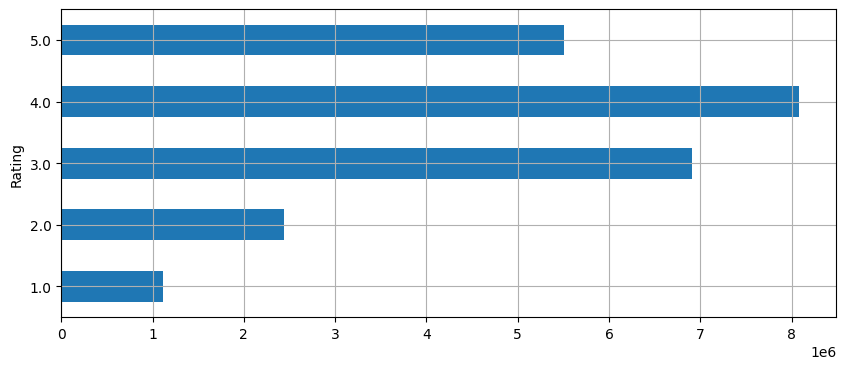

In [17]:
stars.plot(kind='barh',figsize=(10,4),legend=False)

plt.grid(True)

In [18]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column

df_na=pd.DataFrame(pd.isna(data.Rating))

In [19]:
df_na

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [20]:
df_na=df_na[df_na['Rating']==True]

In [21]:
df_na

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [22]:
df_na.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [23]:
df_na.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [24]:
df_na=df_na.reset_index()

In [25]:
df_na.shape

(4499, 2)

In [26]:
df_na['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [27]:
df_na['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [28]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 549 to 693 and so on

movie_np=[]
movie_id=1

for i,j in zip(df_na['index'][1:],df_na['index'][:-1]):
  temp = np.full((1,i-j-1), movie_id)
  movie_np = np.append(movie_np, temp)
  movie_id += 1

In [29]:
df_na.iloc[-1,0]

24057834

In [30]:
# account for last record and corresponding length

last_app=np.full((1,len(data ) - df_na.iloc[-1, 0] -1),movie_id)
movie_np = np.append(movie_np, last_app)

In [31]:
data.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [32]:
len(data)

24058263

In [33]:
df_na

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [34]:
x=zip(df_na['index'][1:], df_na['index'][:-1])

In [35]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [36]:
temp=np.full((1,145),2)

In [37]:
data=data[pd.notnull(data['Rating'])]

In [38]:
data['Movie_id']=movie_np.astype(int)
data['Cust_Id']=data['Cust_Id'].astype(int)

<ipython-input-38-ca0415bed1a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Movie_id']=movie_np.astype(int)
<ipython-input-38-ca0415bed1a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cust_Id']=data['Cust_Id'].astype(int)


In [39]:
data.head()

,Cust_Id,Rating,Movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [40]:
data['Movie_id'].value_counts()

1905    193941
2152    162597
3860    160454
4432    156183
571     154832
         ...  
4294        44
915         43
3656        42
4338        39
4362        36
Name: Movie_id, Length: 4499, dtype: int64

In [41]:
data.head()

,Cust_Id,Rating,Movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [42]:
data.tail()

,Cust_Id,Rating,Movie_id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [43]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers

f=['count','mean']

In [44]:
new_data=data.groupby('Movie_id').agg(f)

In [45]:
new_data

Cust_Id               Rating          
           count          mean  count      mean
Movie_id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [46]:

new_data=data.groupby('Movie_id')['Rating'].agg(['count','mean'])

In [47]:
new_data

,count,mean
Movie_id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [48]:
new_data['count'].quantile(0.7)

1798.6

In [49]:
##now we will create a benchmark

movie_benchmark=round(new_data['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [50]:
new_data

,count,mean
Movie_id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [51]:
drop_movie=new_data[new_data['count']<movie_benchmark].index

In [52]:
drop_movie

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_id', length=3149)

In [54]:
#now we will remove all the users that are in-active

drop_users=data.groupby('Cust_Id')['Rating'].agg(f)

In [55]:
drop_users

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [56]:
cust_bm=round(drop_users['count'].quantile(0.7),0)

In [57]:
cust_bm

52.0

In [58]:
drop_cust=drop_users[drop_users['count']<cust_bm].index

In [59]:
drop_cust

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [60]:
#remove all the customers and movies who has less  benchmark

print('The original dataframe has: ', data.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [61]:
data=data[~data['Movie_id'].isin(drop_movie)]

In [62]:
data

,Cust_Id,Rating,Movie_id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
...,...,...,...
24056844,267802,4.0,4496
24056845,1559566,3.0,4496
24056846,293198,3.0,4496
24056847,70814,2.0,4496


In [63]:
data=data[~data['Cust_Id'].isin(drop_cust)]

In [64]:
print('After the triming, the shape is: {}'.format(data.shape))

After the triming, the shape is: (17337458, 3)


In [69]:
data.head()

,Cust_Id,Rating,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [71]:
#preparing data for svd
title = pd.read_csv('/content/drive/MyDrive/Copy of movie_titles (1).csv',  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_id','Year','Name' ])

title.set_index('Movie_id', inplace=True)

In [74]:
title.head()

,Year,Name
Movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [73]:
title.tail()

,Year,Name
Movie_id,,
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch
17769,2003.0,The Company
17770,2003.0,Alien Hunter


In [75]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156231 sha256=fdbadaf1aaf42d5f5b2f7e88d9314340d579a93d2d721dd619766fd1b373ef1e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [77]:
import math
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [78]:
reader=Reader()

In [79]:
df1=Dataset.load_from_df(data[['Cust_Id','Movie_id','Rating']][:100000], reader)

In [80]:
svd=SVD()

In [81]:
cross_validate(svd,df1,measures=['RMSE','MAE'],verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9999  0.9931  1.0001  0.9966  1.0030  0.9986  0.0034  
MAE (testset)     0.7979  0.7950  0.8001  0.7940  0.8031  0.7980  0.0033  
Fit time          3.63    4.69    3.39    2.10    6.23    4.01    1.38    
Test time         1.23    0.31    0.12    0.10    0.57    0.46    0.42    


{'test_rmse': array([0.99989388, 0.99313732, 1.00011347, 0.99663492, 1.0030299 ]),
 'test_mae': array([0.79794419, 0.79501267, 0.80009878, 0.79404154, 0.8031216 ]),
 'fit_time': (3.6340157985687256,
  4.688120603561401,
  3.3860204219818115,
  2.104532241821289,
  6.234054327011108),
 'test_time': (1.2268798351287842,
  0.30522918701171875,
  0.12386202812194824,
  0.0961618423461914,
  0.5682806968688965)}

In [83]:
data.head()

,Cust_Id,Rating,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [84]:
#now we are taking user 712664 and we try to
# recommended some movie to him ,based on his past rating , he rated as 5

In [85]:
user_712664=data[(data['Cust_Id']==712664)&(data['Rating']==5)]
user_712664

,Cust_Id,Rating,Movie_id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
...,...,...,...
20461546,712664,5.0,3887
21752209,712664,5.0,4109
22487781,712664,5.0,4266
23397883,712664,5.0,4384


In [89]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset


In [90]:
user_712664=title.copy()

In [91]:
user_712664

,Year,Name
Movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [93]:
user_712664=user_712664.reset_index()
user_712664

,index,Movie_id,Year,Name
0,0,1,2003.0,Dinosaur Planet
1,1,2,2004.0,Isle of Man TT 2004 Review
2,2,3,1997.0,Character
3,3,4,1994.0,Paula Abdul's Get Up & Dance
4,4,5,2004.0,The Rise and Fall of ECW
...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17766,17767,2004.0,Fidel Castro: American Experience
17767,17767,17768,2000.0,Epoch
17768,17768,17769,2003.0,The Company


In [94]:
user_712664=user_712664[~user_712664['Movie_id'].isin(drop_movie)]
user_712664

,index,Movie_id,Year,Name
2,2,3,1997.0,Character
7,7,8,2004.0,What the #$*! Do We Know!?
15,15,16,1996.0,Screamers
16,16,17,2005.0,7 Seconds
17,17,18,1994.0,Immortal Beloved
...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17766,17767,2004.0,Fidel Castro: American Experience
17767,17767,17768,2000.0,Epoch
17768,17768,17769,2003.0,The Company


In [95]:
user_712664['Estimate_score']=user_712664['Movie_id'].apply(lambda x: svd.predict(712664, x).est)
user_712664=user_712664.drop('Movie_id', axis=1)

<ipython-input-95-107835fbce49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_score']=user_712664['Movie_id'].apply(lambda x: svd.predict(712664, x).est)


In [96]:
user_712664

,index,Year,Name,Estimate_score
2,2,1997.0,Character,4.227154
7,7,2004.0,What the #$*! Do We Know!?,2.940904
15,15,1996.0,Screamers,3.757939
16,16,2005.0,7 Seconds,3.052990
17,17,1994.0,Immortal Beloved,3.849964
...,...,...,...,...
17765,17765,2002.0,Where the Wild Things Are and Other Maurice Se...,3.747796
17766,17766,2004.0,Fidel Castro: American Experience,3.747796
17767,17767,2000.0,Epoch,3.747796
17768,17768,2003.0,The Company,3.747796


In [97]:
user_712664=user_712664.sort_values('Estimate_score',ascending=False) # we need top estimator value
print(user_712664)

       index    Year                        Name  Estimate_score
27        27  2002.0             Lilo and Stitch        4.268201
2          2  1997.0                   Character        4.227154
17        17  1994.0            Immortal Beloved        3.849964
15        15  1996.0                   Screamers        3.757939
12895  12895  1994.0       Bullets Over Broadway        3.747796
...      ...     ...                         ...             ...
17769  17769  2003.0                Alien Hunter        3.747796
29        29  2003.0      Something's Gotta Give        3.598353
16        16  2005.0                   7 Seconds        3.052990
25        25  2004.0             Never Die Alone        2.948398
7          7  2004.0  What the #$*! Do We Know!?        2.940904

[14621 rows x 4 columns]


In [98]:
user_712664.head()

,index,Year,Name,Estimate_score
27,27,2002.0,Lilo and Stitch,4.268201
2,2,1997.0,Character,4.227154
17,17,1994.0,Immortal Beloved,3.849964
15,15,1996.0,Screamers,3.757939
12895,12895,1994.0,Bullets Over Broadway,3.747796
